## Building Simple Workflow or Graph using LangGraph


In [19]:
## Creating State
from typing_extensions import TypedDict

class State(TypedDict):
    graph_info:str

In [ ]:
## Creating a Nodes
def start_play(state:State) -> State:
    print("start_play node is called")
    return {
        "graph_info": state["graph_info"]+" I'm plannig to play a game"
    }

def cricket_game(state:State) -> State:
    print("cricket_game node is called")
    return {
        "graph_info": state["graph_info"]+" I'm going to play cricket"
    }

def football_game(state:State) -> State:
    print("football_game node is called")
    return {
        
    }


In [21]:
import random
from typing import Literal
 
## Creating a Random Play Node
def random_play(state:State) -> Literal["cricket_game","football_game"]:
    graph_info = state["graph_info"]
    if random.random() > 0.5:
        return "cricket_game"
    else:
        return "football_game"

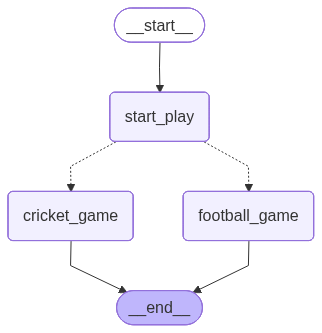

In [23]:
## Constructuring graph
from IPython.display import Image, display
from langgraph.graph import StateGraph,START,END

## Creating a Graph
graph = StateGraph(State)

## Adding Nodes to the Graph
graph.add_node("start_play",start_play)
graph.add_node("cricket_game",cricket_game)
graph.add_node("football_game",football_game)

## Scheduling the Nodes
graph.add_edge(START, "start_play")
graph.add_conditional_edges("start_play",random_play)
graph.add_edge("cricket_game",END)
graph.add_edge("football_game",END)

## Compile the Graph
compiled_graph = graph.compile()
## Visualizing the Graph
display(Image(compiled_graph.get_graph().draw_mermaid_png()))



In [39]:
## Graph Invocation
compiled_graph.invoke({"graph_info":"Hey My name is John "})

start_play node is called
cricket_game node is called


{'graph_info': "Hey My name is John I'm plannig to play a gameI'm going to play cricket"}